<a href="https://colab.research.google.com/github/SrinidhiMokidi/AIML/blob/main/metadata_AIML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Linear Regression

Mean Squared Error: 0.6536995137170021
Coefficients: [[2.79932366]]
Intercept: [4.14291332]


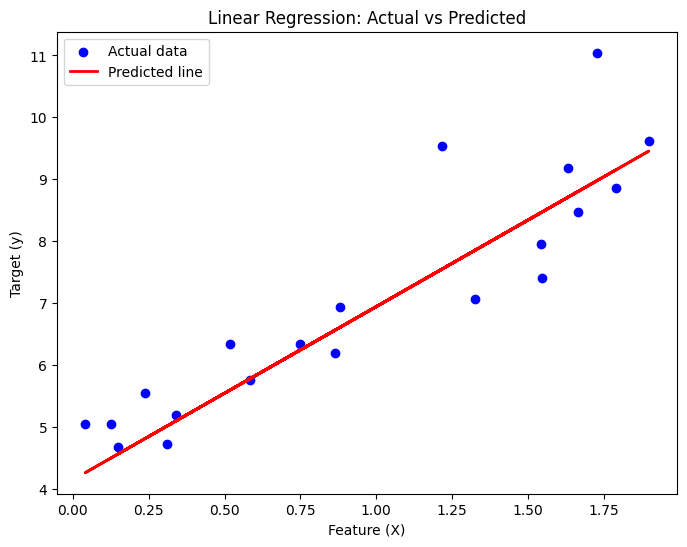

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {lin_reg.coef_}")
print(f"Intercept: {lin_reg.intercept_}")


plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
Decision Tree

Mean Squared Error: 0.9159978198219152


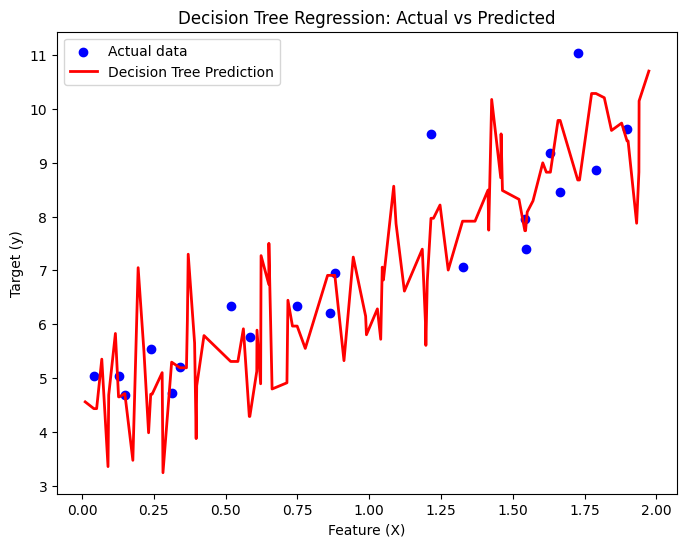

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 1. Generating a simple dataset
# X is the feature, y is the target
np.random.seed(42)  # for reproducibility
X = 2 * np.random.rand(100, 1)  # Random feature data
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise

# 2. Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Applying Decision Tree Regression model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# 4. Predictions
y_pred = tree_reg.predict(X_test)

# 5. Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 6. Plotting the results
# Sorting values to get a smooth plot
X_grid = np.sort(np.concatenate((X_train, X_test), axis=0), axis=0)

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_grid, tree_reg.predict(X_grid), color='red', linewidth=2, label='Decision Tree Prediction')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
SVM

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/mnt/data/metadata.csv'
data = pd.read_csv('/content/drive/MyDrive/metadata.csv')

# Step 1: Data Preprocessing
# Convert 'shape' column from string to tuple and split it into width, height, and channels
data['shape'] = data['shape'].apply(lambda x: eval(x))  # Convert string to tuple
data['width'] = data['shape'].apply(lambda x: x[0])
data['height'] = data['shape'].apply(lambda x: x[1])
data['channels'] = data['shape'].apply(lambda x: x[2] if len(x) > 2 else 1)

# Encode the 'mode' and 'class' columns using LabelEncoder
label_encoder_mode = LabelEncoder()
data['mode_encoded'] = label_encoder_mode.fit_transform(data['mode'])

label_encoder_class = LabelEncoder()
data['class_encoded'] = label_encoder_class.fit_transform(data['class'])

# Step 2: Define Features and Target
X = data[['width', 'height', 'channels', 'mode_encoded']]  # Features (Image properties)
y = data['class_encoded']  # Target (Tumor classification)

# Step 3: Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


# Step 5: Make Predictions on Test Data
y_pred = svm_model.predict(X_test)

# Step 6: Evaluate the Model
report = classification_report(y_test, y_pred, target_names=label_encoder_class.classes_)

# Output the classification report
print(report)


              precision    recall  f1-score   support

      normal       0.73      0.65      0.69       399
       tumor       0.75      0.82      0.78       521

    accuracy                           0.74       920
   macro avg       0.74      0.73      0.73       920
weighted avg       0.74      0.74      0.74       920



In [ ]:
Random Forest

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/mnt/data/metadata.csv'
data = pd.read_csv('/content/drive/MyDrive/metadata.csv')

# Step 1: Data Preprocessing
# Convert 'shape' column from string to tuple and split it into width, height, and channels
data['shape'] = data['shape'].apply(lambda x: eval(x))  # Convert string to tuple
data['width'] = data['shape'].apply(lambda x: x[0])
data['height'] = data['shape'].apply(lambda x: x[1])
data['channels'] = data['shape'].apply(lambda x: x[2] if len(x) > 2 else 1)

# Encode the 'mode' and 'class' columns using LabelEncoder
label_encoder_mode = LabelEncoder()
data['mode_encoded'] = label_encoder_mode.fit_transform(data['mode'])

label_encoder_class = LabelEncoder()
data['class_encoded'] = label_encoder_class.fit_transform(data['class'])

# Step 2: Define Features and Target
X = data[['width', 'height', 'channels', 'mode_encoded']]  # Features (Image properties)
y = data['class_encoded']  # Target (Tumor classification)

# Step 3: Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make Predictions on Test Data
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the Model
report = classification_report(y_test, y_pred, target_names=label_encoder_class.classes_)

# Output the classification report
print(report)


              precision    recall  f1-score   support

      normal       0.89      0.96      0.93       399
       tumor       0.97      0.91      0.94       521

    accuracy                           0.93       920
   macro avg       0.93      0.94      0.93       920
weighted avg       0.94      0.93      0.93       920

